In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42  # no type-3
matplotlib.rcParams['ps.fonttype'] = 42

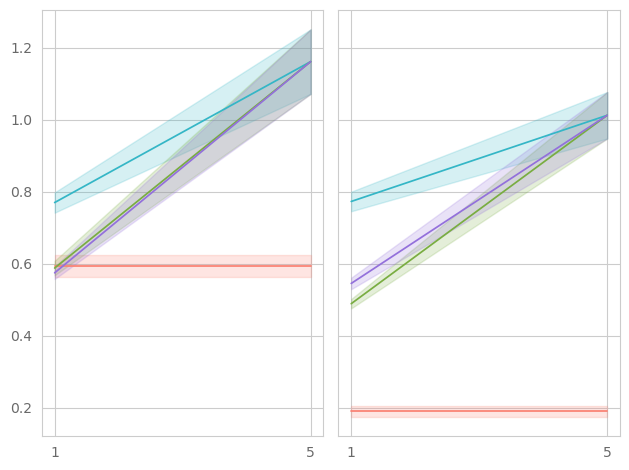

In [78]:
gp_settings = [[0,1]]

#nrct = 1000
poly_degs = [1,5]
methods = ["fax", "om-gax", "om-bax", "om-hax", "dr-bax", "dr-gax", "dr-hax", "ipw",]
methods = ["fax", "om-gax", "om-bax", "om-hax"]
plot_sigma = 2
lw = 1.25
cp = ["salmon", "#4063a3", "#34b6c6", "#533d14", "#79ad41", "#dcc000", "mediumpurple", "black"]
cp_ind = {"fax":0, "ipw":1, "om-gax":2, "om-bax":4, "om-hax":6, "dr-gax":3, "dr-bax":5, "dr-hax":7}
labels = {"fax": r"$\hat{\mu}^a_{OS-OM}$", "ipw": r"$\hat{\mu}^a_{IPSW}$",\
            "om-gax":r"$\hat{\mu}^a_{OM}$", "om-bax":r"$\hat{\mu}^a_{ABC}$", "om-hax":r"$\hat{\mu}^a_{AOM}}$",\
            "dr-gax":r"$\hat{\mu}^a_{DR-OM}$", "dr-bax":r"$\hat{\mu}^a_{DR-ABC}$", "dr-hax":r"$\hat{\mu}^a_{DR-AOM}}$"}
markers = {"fax":" ", "ipw":" ", "om-gax":" ", "om-bax":" ", "om-hax":" ", "dr-gax":" ", "dr-bax":" ", "dr-hax":" "}
line_styles = {"fax":"-", "ipw":"-", "om-gax":"-", "om-bax":"-", "om-hax":"-", "dr-gax":"-", "dr-bax":"-", "dr-hax":"-"}

par_res_dir = "res_nrct_200"

fig, axes = plt.subplots(nrows=1, ncols=2,sharex='col', sharey='row')
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")
dfs = {}
for i in range(1):
    for j in range(2):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"{par_res_dir}/gp_draw_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})
        dfs[j] = df_res
        for met in methods:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_rmse = met_df["RMSE"]
            std_rmse = met_df["Std.Dev."]
            lb = mean_rmse - plot_sigma * std_rmse
            ub = mean_rmse + plot_sigma * std_rmse
            axes[j].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], label=labels[met])
            axes[j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=0.2)
            axes[j].set_xticks(poly_degs)
            axes[j].tick_params(axis='x', colors='dimgray')
            axes[j].tick_params(axis='y', colors='dimgray')
            
#plt.legend(ncols=4, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig(f"rmse_nrct{200}.svg", bbox_inches="tight")

In [79]:
dfs[0]

,Method,RMSE,Std.Dev.,Squared-Bias,Std.Dev..1,Variance,Std.Dev..2
0,fax-PD-1,0.59322,0.01537,0.56464,0.02220,0.00000,0.00000
1,om-gax-PD-1,0.76948,0.01409,0.49314,0.02420,0.27771,0.00614
2,om-bax-PD-1,0.58761,0.01003,0.21465,0.01381,0.22126,0.00443
3,om-hax-PD-1,0.57432,0.00862,0.11583,0.00865,0.28094,0.00719
4,fax-PD-5,0.59322,0.01537,0.56464,0.02220,0.00000,0.00000
5,om-gax-PD-5,1.16082,0.04477,0.06010,0.00748,3.09127,0.25462
6,om-bax-PD-5,1.16082,0.04477,0.06010,0.00748,3.09127,0.25462
7,om-hax-PD-5,1.16081,0.04477,0.06010,0.00748,3.09126,0.25462


In [80]:
dfs[1]

,Method,RMSE,Std.Dev.,Squared-Bias,Std.Dev..1,Variance,Std.Dev..2
0,fax-PD-1,0.18973,0.00776,0.09017,0.00864,0.00000,0.00000
1,om-gax-PD-1,0.77249,0.01360,0.47299,0.02193,0.29027,0.00658
2,om-bax-PD-1,0.48861,0.00650,0.07598,0.00783,0.20077,0.00398
3,om-hax-PD-1,0.54485,0.00799,0.08087,0.00807,0.27345,0.00795
4,fax-PD-5,0.18973,0.00776,0.09017,0.00864,0.00000,0.00000
5,om-gax-PD-5,1.01181,0.03226,0.07365,0.00711,1.88687,0.13666
6,om-bax-PD-5,1.01181,0.03226,0.07365,0.00711,1.88687,0.13666
7,om-hax-PD-5,1.01182,0.03226,0.07365,0.00711,1.88687,0.13666


FileNotFoundError: [Errno 2] No such file or directory: 'res_nrct_200/mpx_nrct_200/gp_draw_0/res_wstd.csv'

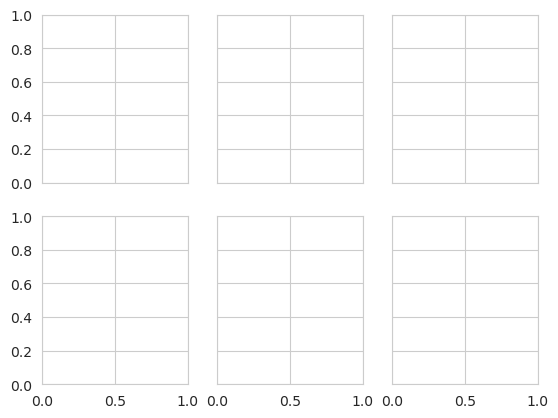

In [81]:
nrct = 200

fig, axes = plt.subplots(nrows=2, ncols=3,sharex='col', sharey='row')
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")

for i in range(2):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"{par_res_dir}/mpx_nrct_{nrct}/gp_draw_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        for met in methods:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_rmse = met_df["Squared-Bias"]
            std_rmse = met_df["Std.Dev..1"]
            lb = mean_rmse - plot_sigma * std_rmse
            ub = mean_rmse + plot_sigma * std_rmse
            axes[i, j].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=0.2)
            axes[i, j].set_xticks(poly_degs)
            axes[i, j].tick_params(axis='x', colors='dimgray')
            axes[i, j].tick_params(axis='y', colors='dimgray')

plt.tight_layout()
plt.savefig(f"sqb_nrct{nrct}.svg", bbox_inches="tight")

In [ ]:
nrct = 200

fig, axes = plt.subplots(nrows=2, ncols=3,sharex='col', sharey='row')
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")

for i in range(2):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"{par_res_dir}/mpx_nrct_{nrct}/gp_draw_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        for met in methods:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_rmse = met_df["Variance"]
            std_rmse = met_df["Std.Dev..2"]
            lb = mean_rmse - plot_sigma * std_rmse
            ub = mean_rmse + plot_sigma * std_rmse
            axes[i, j].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=0.2)
            axes[i, j].set_xticks(poly_degs)
            axes[i, j].tick_params(axis='x', colors='dimgray')
            axes[i, j].tick_params(axis='y', colors='dimgray')
        
plt.tight_layout()
plt.savefig(f"var_nrct{nrct}.svg", bbox_inches="tight")


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,2))
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")


for i in range(2):
    df_res = pd.read_csv(f"{par_res_dir}/faxn_nrct_200/gp_draw_{i}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})
    df_res = pd.concat([pd.concat([df_res.iloc[0:1]] * 3, ignore_index=True), df_res], ignore_index=True)

    for k, pdeg in enumerate(poly_degs):
        df_res.loc[k, "Method"] = f"fax-PD-{k}"

    for met in methods:
        met_df = df_res[df_res["Method"].str.contains(met)]
        mean_rmse = met_df["RMSE"]
        std_rmse = met_df["Std.Dev."]
        lb = mean_rmse - plot_sigma * std_rmse
        ub = mean_rmse + plot_sigma * std_rmse
        axes[i].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], fillstyle=fill_styles[met], label=labels[met])
        axes[i].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=fb_alpha[met])
        axes[i].set_xticks(poly_degs)
        axes[i].tick_params(axis='x', colors='dimgray')
        axes[i].tick_params(axis='y', colors='dimgray')

plt.tight_layout()
plt.savefig(f"fax_noise.svg", bbox_inches="tight")


In [44]:
from scipy.special import legendre

def compute_legendre_polynomials(x, order):
    return legendre(order)(x)

data = {
    "X": 2 * np.random.rand(10) - 1,  # Sample X column
    "U": 2 * np.random.rand(10) - 1   # Sample U column
}

df = pd.DataFrame(data)
orders = [1, 2, 3, 4, 5]

for order in orders:
    df[f'X{order}'] = df['X'].apply(lambda x: compute_legendre_polynomials(x, order))
for order in orders:
    df[f'U{order}'] = df['U'].apply(lambda u: compute_legendre_polynomials(u, order))

print(df)

          X         U        X1        X2        X3        X4        X5  \
0 -0.394443  0.513035 -0.394443 -0.266622  0.438241 -0.102541 -0.277789   
1 -0.744560  0.504846 -0.744560  0.331555  0.084936 -0.359336  0.413636   
2  0.535524 -0.282690  0.535524 -0.069821 -0.419334 -0.340620  0.007128   
3  0.400899  0.572240  0.400899 -0.258920 -0.440267 -0.114689  0.269452   
4 -0.089833  0.232824 -0.089833 -0.487895  0.132937  0.345023 -0.162139   
5  0.454289 -0.908501  0.454289 -0.190432 -0.447045 -0.212579  0.183805   
6  0.785331 -0.829478  0.785331  0.425118  0.032877 -0.273655 -0.413139   
7  0.065914 -0.477106  0.065914 -0.493483 -0.098155  0.358790  0.121093   
8  0.673306 -0.645382  0.673306  0.180012 -0.246866 -0.425887 -0.318662   
9 -0.614153 -0.526761 -0.614153  0.065776  0.342108 -0.417018  0.187317   

         U1        U2        U3        U4        U5  
0  0.513035 -0.105192 -0.431969 -0.308933  0.060287  
1  0.504846 -0.117696 -0.435594 -0.296567  0.078978  
2 -0.282690 